In [33]:
import xarray as xr

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Altimeter Dataset

The altimeter dataset as a list of AWS-hosted NetCDF4 files is characterized by individual spatial squares of observations, over a select time span, per satelite. For example, the below block shows the first file available. Note the structure `IMOS/SRS/Surface-Waves/Wave-Wind-Altimetry-DM00/<SATELITE>/<COARSE SPATIAL TILE>/<ID with narrow spatial tile>`

```
https://imos-data.s3-ap-southeast-2.amazonaws.com/IMOS/SRS/Surface-Waves/Wave-Wind-Altimetry-DM00/SENTINEL-3B/060S_300E/IMOS_SRS-Surface-Waves_MW_SENTINEL-3B_FV02_041S-300E-DM00.nc
```

## THREDDS Access
Due to the large number of files and volume, the best way to access files is through THREDDS OPeNDAP. This protocol allows you to work with the files as if they were local, while keeping them remote. It achieves this through using the file metadata, and only on calculations involving actual values will it retrieve the required data. For additional information on using THREDDS please review [Data Access Methods](https://oceanhackweek.org/ohw23/tutorials/01-Tue/Data_access_methods_Python.html?), I found it to be very helpful. 

To use please replace `https://imos-data.s3-ap-southeast-2.amazonaws.com/` prefix with `https://thredds.aodn.org.au/thredds/dodsC/` in the file URLs. 
From this point we can treat each URL as the filepath, working with them through xarray as below.

In [34]:
# Specify THREDDS file URL
filename = "https://thredds.aodn.org.au/thredds/dodsC/IMOS/SRS/Surface-Waves/Wave-Wind-Altimetry-DM00/SENTINEL-3B/060S_300E/IMOS_SRS-Surface-Waves_MW_SENTINEL-3B_FV02_041S-300E-DM00.nc"

In [35]:
# Open dataset using xarray
ds = xr.open_dataset(filename)
ds

<xarray.Dataset> Size: 375kB
Dimensions:                  (TIME: 3230)
Coordinates:
  * TIME                     (TIME) datetime64[ns] 26kB 2018-06-14T13:30:20.0...
    LATITUDE                 (TIME) float32 13kB ...
    LONGITUDE                (TIME) float32 13kB ...
Data variables: (12/24)
    BOT_DEPTH                (TIME) float32 13kB ...
    DIST2COAST               (TIME) float32 13kB ...
    SIG0_C                   (TIME) float32 13kB ...
    SIG0_C_quality_control   (TIME) float32 13kB ...
    SIG0_C_num_obs           (TIME) float32 13kB ...
    SIG0_C_std_dev           (TIME) float32 13kB ...
    ...                       ...
    SWH_KU_std_dev           (TIME) float32 13kB ...
    MEAN_WAVE_PERIOD         (TIME) float64 26kB ...
    UWND                     (TIME) float32 13kB ...
    VWND                     (TIME) float32 13kB ...
    WSPD                     (TIME) float32 13kB ...
    WSPD_CAL                 (TIME) float32 13kB ...
Attributes: (12/29)
    abstract:                      This database contains global data of wind...
    acknowledgement:               Any users of IMOS data are required to cle...
    author_email:                  agus.ribal@gmail.com
    author:                        Ribal, Agustinus
    citation:                      The citation in a list of references is: "...
    Conventions:                   CF-1.6,IMOS-1.4
    ...                            ...
    project:                       Integrated Marine Observing System (IMOS)
    source:                        RADS
    standard_name_vocabulary:      NetCDF Climate and Forecast (CF) Metadata ...
    time_coverage_start:           2018-06-14T13:30:20Z
    time_coverage_end:             2025-06-16T02:29:25Z
    title:                         SENTINEL-3B altimeter wave/wind data

## Altimeter Observation Visualization

In [36]:
# Access key variables
lat = ds["LATITUDE"]
lon = ds["LONGITUDE"]
swh = ds["SWH_C"]
times = ds['TIME']


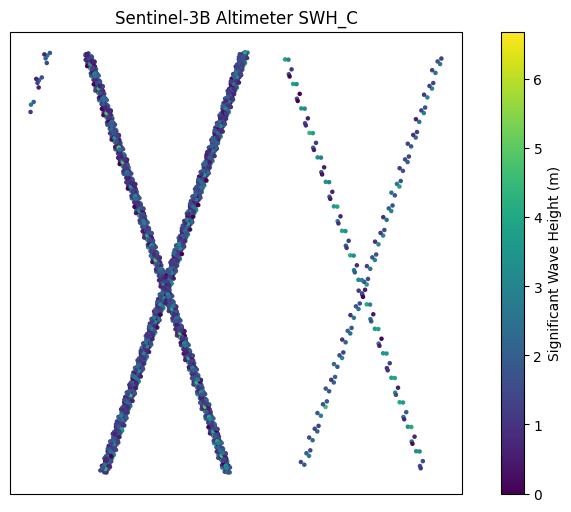

In [37]:
# Visualize altimeter ground tracks over time

fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

sc = ax.scatter(
    lon,
    lat,
    c=swh,
    s=5,
    cmap="viridis",
    transform=ccrs.PlateCarree()
)

ax.coastlines()
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

plt.colorbar(sc, ax=ax, label="Significant Wave Height (m)")
ax.set_title("Sentinel-3B Altimeter SWH_C")

plt.show()
